In [1]:
from bs4 import BeautifulSoup
import requests
category = ['political','social','market','entertainment','sports','view','blog','International']
n = int(input("Enter no of page = "))
news_df = {'Category':[],'Link':[],'News':[]}
for i in range(1,n+1):
    for cat in category:
        url = BeautifulSoup(f'https://en.setopati.com/{cat}?page={i}', 'html.parser')
        data = requests.get(url)
        news_code = BeautifulSoup(data.text, "lxml")
        for link in news_code.find_all('a'):
            if f"{cat}/" in link.get('href'):
                news_df['Link'].append(link.get('href'))
                news_df['Category'].append(cat)

Enter no of page = 1000


C:\Users\Anand\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [ ]:
news_df['News']
for i in news_df['Link']:
    url = BeautifulSoup(i, 'html.parser')
    data = requests.get(url)
    news_code = BeautifulSoup(data.text, "lxml")
    try:
        final_new =news_code.find('div', class_='editor-box').text
        news_df['News'].append(final_new)
    except:
        news_df['News'].append("NAN")       
news_df

In [2]:
print(len(news_df['Link']))

31960


In [8]:
df.to_csv('setopati_news.csv')

In [16]:
import numpy as np 
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import pandas as pd
data = pd.read_csv('setopati_news.csv')
data.head()

,Unnamed: 0,Category,Link,News
0,0,political,https://en.setopati.com/political/160818,\nRastriya Swatantra Party (RSP) has removed D...
1,1,political,https://en.setopati.com/political/160818,\nRastriya Swatantra Party (RSP) has removed D...
2,2,political,https://en.setopati.com/political/160836,\nCPN (Unified Socialist) Chief Whip Met Mani ...
3,3,political,https://en.setopati.com/political/160835,\nCPN-UML Chairman is suffering from fever and...
4,4,political,https://en.setopati.com/political/160833,\nNarayan Prakash (NP) Saud has been sworn in ...


In [18]:
data.info

<bound method DataFrame.info of        Unnamed: 0       Category  \
0               0      political   
1               1      political   
2               2      political   
3               3      political   
4               4      political   
...           ...            ...   
31955       31955           view   
31956       31956           blog   
31957       31957           blog   
31958       31958  International   
31959       31959  International   

                                               Link  \
0          https://en.setopati.com/political/160818   
1          https://en.setopati.com/political/160818   
2          https://en.setopati.com/political/160836   
3          https://en.setopati.com/political/160835   
4          https://en.setopati.com/political/160833   
...                                             ...   
31955           https://en.setopati.com/view/157157   
31956           https://en.setopati.com/blog/157721   
31957           https://en.setopati.com/

In [20]:
print(len(data['Link']))
print(len(data['News']))
print(len(data['Category']))

31960
31960
31960


In [22]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Link          0
News          0
dtype: int64

In [3]:
data['News'][0]

"\nRastriya Swatantra Party (RSP) has removed Dhaka Kumar Shrestha from lawmaker and party member after the audio recording of a phone conversation alleged to be between him and businessman Durga Prasai.\nThe party’s central committee meeting held on Wednesday has decided to punish Shrestha after audio recording of him purportedly demanding Rs 20 million from promoter of B&C Medical College Durga Prasai was made public.\nTalking to reporters after the meeting RSP President Lamichhane said that Shrestha was removed after finding enough grounds to punish him despite him denying that the voice on the audio was not his.\nKapurbot Media on Sunday had published audio recording of what it claims is the deal between Shrestha and Prasai.\nShrestha, who was elected to the House of Representatives (HoR) through the Proportional Representation electoral system, can be heard telling Prasai that the amount was needed to give to RSP President Rabi Lamichhane’s men for Shrestha to become health minist

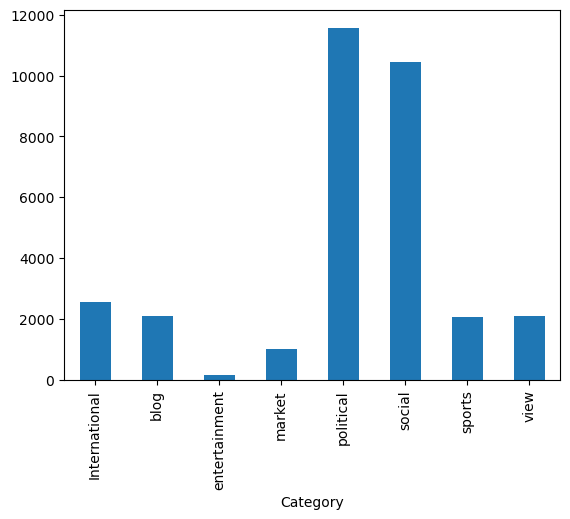

In [4]:
import matplotlib.pyplot as plt
#Analyzing data
data.groupby('Category').News.count().plot.bar(ylim=0)
plt.show()

In [5]:
x = data.groupby('Category').News.count()
x

Category
International     2554
blog              2090
entertainment      141
market            1000
political        11574
social           10444
sports            2068
view              2089
Name: News, dtype: int64

In [6]:
#cleaning dataset
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
data['cleaned'] = data['News'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data['cleaned'][0]

'rastriya swatantra parti rsp remov dhaka kumar shrestha lawmak parti member audio record phone convers alleg businessman durga prasai the parti central committe meet held wednesday decid punish shrestha audio record purportedli demand rs million promot b c medic colleg durga prasai made public talk report meet rsp presid lamichhan said shrestha remov find enough ground punish despit deni voic audio kapurbot media sunday publish audio record claim deal shrestha prasai shrestha elect hous repres hor proport represent elector system heard tell prasai amount need give rsp presid rabi lamichhan men shrestha becom health minist the convers took place start januari prasai inform audio rsp negoti rule coalit also includ cpn uml get health ministri shrestha heard tell prasai lamichhan would make heath minist hand rs million lamichhan men lamichhan also reveal shrestha threaten parti disciplin committe finish rsp punish he repeatedli chang version hi guilt proven also audio record januari he al

In [8]:
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))

X = data['cleaned']
Y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25) #Splitting dataset

In [10]:
#Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

In [11]:
#Training model
model = pipeline.fit(X_train, y_train)

C:\Users\Anand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [12]:
#Accuracy
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
print(accuracy_score(y_test,predict))
print('\n')
print(predict)

0.8345431789737171


['political' 'social' 'political' ... 'political' 'political' 'social']


In [13]:
real_news = input("Enter any news ")
realtime_news = pd.DataFrame({'real_news':[real_news]})
#Accuracy
from sklearn.metrics import accuracy_score
predict = model.predict(realtime_news['real_news'])

print('\n')
print(predict[0])

Enter any news Anurag Maloo, who went missing on Monday, was found in a critical condition by rescuers.  Two other Indian climbers were rescued on Tuesday, while an Irish climber died while descending Annapurna.  It is the 10th highest mountain in the world and is known for its treacherous terrain.  Mr Maloo is currently seeking treatment at Manipal Hospital in Pokhara city, a sherpa from Seven Summit Treks - a mountaineering company that led the search operation - told India's ANI news agency.  Amit Chowdhury, a board member at the UIAA - the international mountaineering and climbing federation based in Switzerland - told the BBC that it was possible for climbers to survive after falling into a crevasse.  "A crevasse is warmer and well protected from wind. So if he was not badly injured, it's not unusual that he survived in a crevasse," he said.  A resident of Rajasthan state, Mr Maloo, went missing at around 6,000m (19,600ft) while descending from a camp.  "While coming down, he slip

In [14]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

C:\Users\Anand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

International       1.00      0.78      0.88       651
         blog       1.00      0.95      0.98       574
entertainment       0.00      0.00      0.00        30
       market       1.00      1.00      1.00       267
    political       0.79      0.78      0.79      2847
       social       0.74      0.82      0.78      2600
       sports       1.00      0.97      0.98       516
         view       1.00      0.96      0.98       505

     accuracy                           0.83      7990
    macro avg       0.82      0.78      0.80      7990
 weighted avg       0.84      0.83      0.83      7990

[[ 510    0    0    0   79   62    0    0]
 [   0  548    0    0    5   21    0    0]
 [   0    0    0    0    4   26    0    0]
 [   0    0    0  267    0    0    0    0]
 [   0    0    0    0 2233  614    0    0]
 [   0    0    0    0  473 2127    0    0]
 [   0    0    0    0    4   14  498    0]
 [   0    0    0    0   11    9    0